# AI 09a Maze Random
---

> 학번:
>
> 이름:

Source: https://github.com/wikibook/pytorch-drl

### Import packages
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## 미로찾기를 위한 강화학습
---

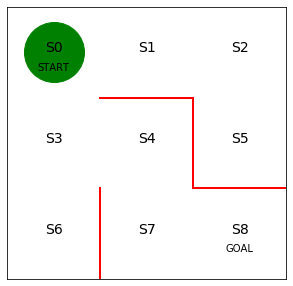

In [ ]:
# 9a.1

# 초기 상태의 미로 모습

# 전체 그림의 크기 및 그림을 나타내는 변수 선언
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 붉은 벽 그리기
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 상태를 의미하는 문자열(S0~S8) 표시
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 그림을 그릴 범위 및 눈금 제거 설정
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)

# S0에 녹색 원으로 현재 위치를 표시
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [ ]:
# 9a.2

# 파라미터 초깃값 theta_0

# 줄은 상태 0~7, 열은 행동방향(상,우,하,좌 순)를 나타낸다.
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8은 목표지점이므로 정책이 없다
                    ])

In [ ]:
# 9a.3 

# 파라미터 theta를 행동 정책 pi로 변환하는 함수
# 단순히 값의 비율을 계산
def theta_to_pi(theta):
    # Edit this

In [ ]:
# 9a.4

# 초기 정책 pi_0
pi_0 = theta_to_pi(theta_0)

print(pi_0)


[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [ ]:
# 9a.6

# 1단계 이동 후 상태 s 반환
def get_next_s(pi, s):
    
    direction = ["up", "right", "down", "left"]

    # pi[s,:]의 확률에 따라 direction 선택
    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        s_next = s - 3
    elif next_direction == "right":
        s_next = s + 1
    elif next_direction == "down":
        s_next = s + 3
    elif next_direction == "left":
        s_next = s - 1

    return s_next



In [ ]:
# 9a.7

# 목표에 도달할 때까지 에이전트를 계속 이동
def goal_maze(pi):
    
    # Edit this

In [ ]:
# 9a.8

# 목표 지점에 이를 때까지 미로 안을 이동
state_history = goal_maze(pi_0)

print(state_history)
print("목표 지점까지 {} 단계".format(len(state_history) - 1))


[0, 3, 6, 3, 4, 7, 8]
목표 지점까지 6 단계


In [ ]:
# 9a.9

# 에이전트의 이동 과정을 시각화
# 참고 URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    '''배경 이미지 초기화'''
    line.set_data([], [])
    return (line,)


def animate(i):
    '''프레임 단위로 이미지 생성'''
    state = state_history[i]  # 현재 위치
    x = (state % 3) + 0.5  # 상태의 x좌표 : 3으로 나눈 나머지 + 0.5
    y = 2.5 - int(state / 3)  # y좌표 : 2.5에서 3으로 나눈 몫을 뺌
    line.set_data(x, y)
    return (line,)


# 초기화 함수와 프레임 단위 이미지 생성함수를 사용하여 애니메이션 생성
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    state_history), interval=200, repeat=False)

HTML(anim.to_jshtml())
